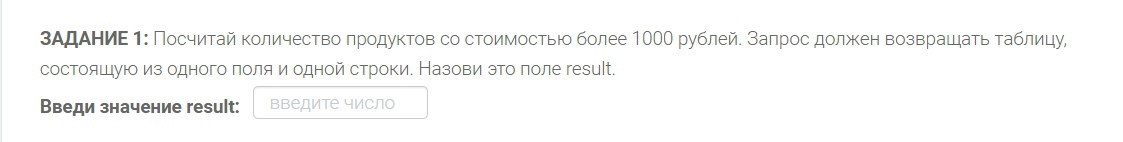

In [ ]:
SELECT COUNT(id) AS result
FROM products 
WHERE price > 1000

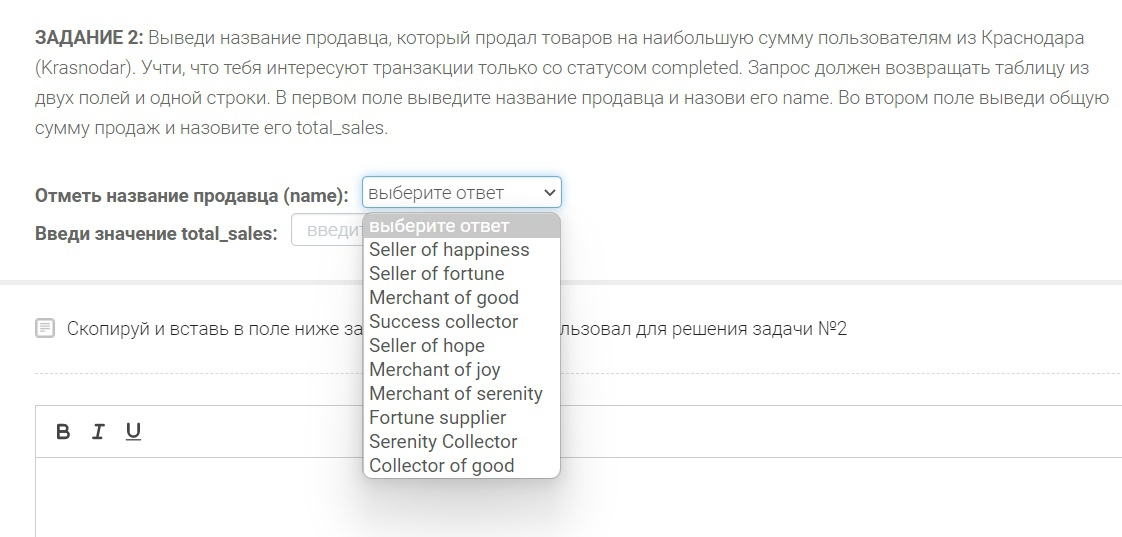

In [ ]:
SELECT sellers.name AS name,
       SUM(price) AS total_sales
FROM transactions
     JOIN products ON transactions.product_id = products.id
     JOIN sellers ON products.seller_id = sellers.id 
     JOIN users ON transactions.user_id = users.id
     JOIN cities ON users.city_id = cities.id
WHERE cities.name = 'Krasnodar' AND status = 'completed'
GROUP BY sellers.name 
ORDER BY total_sales DESC
LIMIT 1

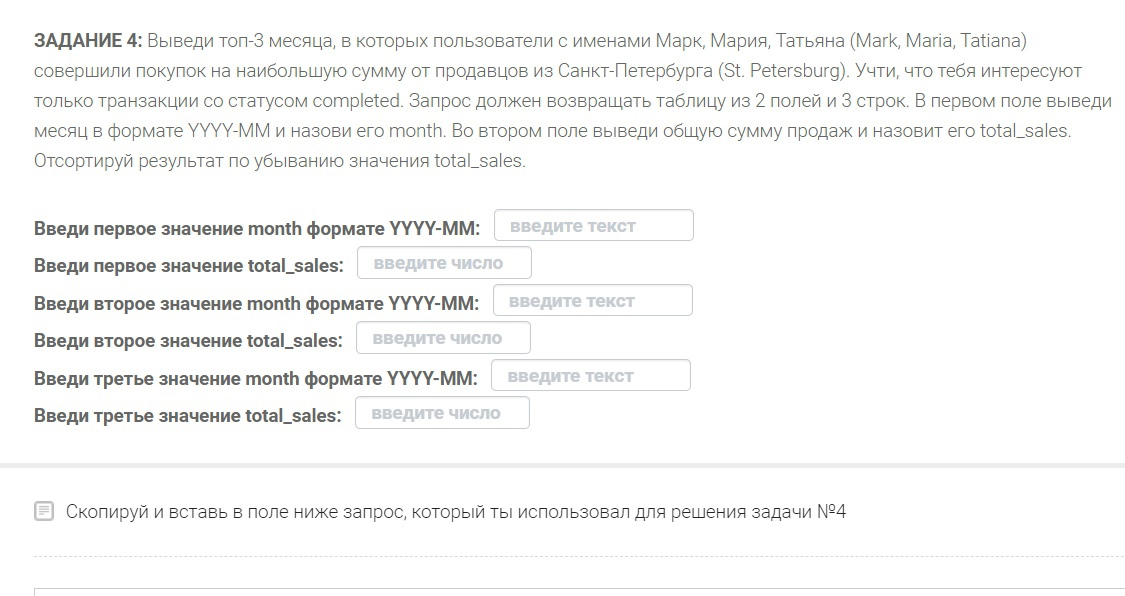

In [ ]:
SELECT DATE_FORMAT(transactions.created_at, '%Y-%m') AS month, 
       SUM(products.price) AS total_sales
FROM transactions 
     JOIN products ON transactions.product_id = products.id
     JOIN sellers ON products.seller_id = sellers.id
     JOIN cities ON sellers.city_id = cities.id
     JOIN users ON transactions.user_id = users.id 
WHERE users.name IN ('Mark', 'Maria', 'Tatiana') 
      AND status = 'completed'
      AND cities.name = 'St. Petersburg'
GROUP BY month
ORDER BY total_sales DESC
LIMIT 3

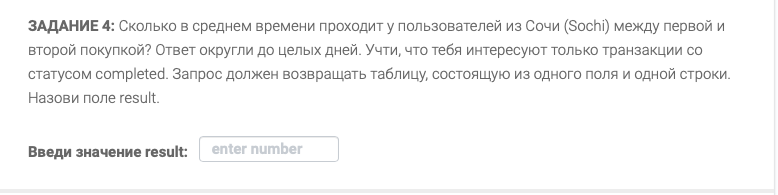

In [ ]:
WITH sochi_user AS 
(
     SELECT 
          users.id AS user, 
          transactions.created_at AS date
     FROM transactions 
          JOIN products ON transactions.product_id = products.id
          JOIN users ON transactions.user_id = users.id
          JOIN cities ON users.city_id = cities.id
     WHERE 
          status = 'completed'
          AND cities.name = 'Sochi'
), 

second_p AS
(
     SELECT 
          user,
          nth_value(date, 2) OVER w AS second
     FROM sochi_user
     WINDOW w AS (PARTITION BY user ORDER BY date ASC)
), 

first_p AS 
(
     SELECT 
          user,
          min(date) AS first
     FROM sochi_user
     GROUP BY user
), 

diff AS 
(
    SELECT
        DATEDIFF(second, first) AS time_between
    FROM second_p JOIN first_p ON second_p.user = first_p.user
)

SELECT ROUND(AVG(time_between)) AS result FROM diff